In [2]:
import numpy as np 
from math import *
import random as r
from matplotlib import pyplot as plt

In /home/alexander/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/alexander/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/alexander/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/alexander/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/alexander/.local/lib/python3.6/site-packages/matplo

In [3]:
# heatmap function

def random_position(dim):
    return r.random() * dim[0], r.random()*dim[1]
def genData(time_steps:int, particles, dim, func: callable):
    data = []
    for t in range(time_steps):
        data.append([])
        for x in range(particles):
            data[t].append(func(dim))
    return data
    
    
            
    

def fheatmap(data,resolution:tuple, dimensions: tuple, origin: tuple):
    heatmap = np.zeros((resolution[1],resolution[0]))
    dimmap = []
    xconv = dimensions[0]/resolution[0]
    yconv = dimensions[1]/resolution[1]
    
    # first constuct edge borders
    
    dimmap.append([])
    for x in range(len(heatmap[0]) + 1):
        xcoord = xconv * x + origin[0]
        dimmap[-1].append(xcoord)
        
    dimmap.append([])
    for y in range(len(heatmap) + 1):
        ycoord = yconv * y + origin[1]
        dimmap[-1].append(ycoord)
    
    div_size: int = len(data[0])
    for t in data:
        for p in t:
            x = p[0]
            y = p[1]
            xind = -1
            yind = -1
            
            # search x
            index: int = len(dimmap[0]) // 2
            step = index // 2
            for loop in range(div_size):
                
                if x < dimmap[0][index + 1] and x > dimmap[0][index]:
                    xind = index
                    
                    break
                elif x < dimmap[0][index]:
                    index = index - step
                
                elif x > dimmap[0][index]:
                    index = index + step
                    
                
                step = step // 2
                    
                    
            # search y
            index: int = len(dimmap[1]) // 2
            step = index // 2
            
            for loop in range(div_size):
                if y < dimmap[1][index + 1] and y > dimmap[1][index]:
                    yind = index
                    
                    break
                elif y < dimmap[1][index]:
                    index = index - step
                
                elif y > dimmap[1][index]:
                    index = index + step
                    
                
                step = step // 2
                    
            
            heatmap[yind][xind] += 1
    
    


In [4]:
d = genData(10,10,(2,3),random_position)
fheatmap(d,(10,10),(2,3),(0,0))

In [5]:
def X (a,kbt,A,T,theta):
    theta = atan(theta)
    print((A/0.2)*tanh(1/(a*10*2*pi)))
    print(A)
    
    
    F = sqrt( pow(T,2.0) + pow(T * tan(theta),2.0))
    B = 1/(a*10*2*pi)
    am = A * 1/(a*10*2*pi)
    
    V = (am)/0.2
    
    
    output = F*pow(a,2) * pow(1/kbt,2) * V / pow(pi,2)
    return output

def Y (a,kbt,T,theta,utheta):
    theta = atan(theta)
    utheta = atan(utheta)
    F = sqrt( T**2 + pow(T * tan(theta),2))
    output =F*a*theta * (1/kbt) * 1/pi
    uoutput = F*a*utheta * (1/kbt) * 1/pi
    return (output, uoutput)

In [16]:
import math
def get_mod(nodes, threshold,amplitude):
    
    upper = 0.005
    lower = 0.005
    x = 0
    a = []
    hb = 0
    
    while(x <= threshold):
        x=0
        a=[]
        for i in range(nodes):
            am = (upper * hb - lower) + lower
            a.append(am)
        for element in a:
            x += element * element
        x = math.sqrt(x)/amplitude
        hb += 0.1
    return hb

def get_ratio(nodes, mod,amplitude):
        
        x = 0
        a = []
        upper = 0.005
        lower = 0.01
    
        for i in range(nodes):
            am =  (upper * mod - lower) + lower
            a.append(am)
            
        for element in a:
            x += element * element
        x = math.sqrt(x)/amplitude
        return x
        

In [17]:

ratios = np.linspace(0,1,100)
mods = []
ratioss = []
for element in ratios:
    mods.append(get_mod(60,element,1))

for element in mods:
    ratioss.append(get_ratio(60,element,1))

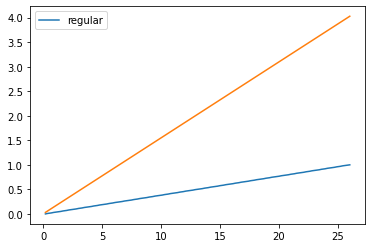

In [18]:
plt.plot(mods,ratios, label='regular')
plt.plot(mods,ratioss)
plt.legend()


In [9]:
import math
import random as r
from matplotlib import pyplot as plt
from scipy import optimize as op 
import numpy as np
def obj(x,a,b,c):
    return a*np.power(x,b) + c
upper = 0.05
lower = 0.005
n = []
d = []
for nn in range(0,1000):
    a = []
    doa = 0
    for i in range(nn):
        ta = r.random()*(upper - lower) + lower
        a.append(ta)
    for element in a:
        doa += element * element
    doa = math.sqrt(doa)
    
    n.append(nn)
    d.append(doa)
    

(array([0.03007356, 0.50132855, 0.0012423 ]), array([[ 5.59008463e-07, -2.39403722e-06, -2.32885265e-06],
       [-2.39403722e-06,  1.02972875e-05,  9.79626160e-06],
       [-2.32885265e-06,  9.79626160e-06,  1.05472907e-05]]))


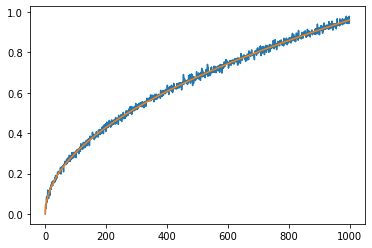

In [10]:
plt.plot(n,d)
polyline = np.linspace(0, 1000, 1000)
curve = op.curve_fit(obj, polyline, d)
print(curve)
noutput = obj(polyline, curve[0][0],curve[0][1],curve[0][2])
plt.plot(polyline,noutput)

In [11]:
print(model2)

NameError: name 'model2' is not defined